In [54]:
import pandas as pd
import numpy as np
import pickle

with open('Brexit_BBC.pickle', 'rb') as file:
    news_to_ana = pickle.load(file)

news_frame = pd.DataFrame(news_to_ana)[['date', 'title', 'content']]
news_frame.head()

,date,title,content
0,2019-05-05,Theresa May urges Jeremy Corbyn to do a Brexit...,"Theresa May has called for Jeremy Corbyn to ""p..."
1,2019-05-05,Newspaper headlines: Could there be a 'last-di...,There's widespread coverage of Theresa May's m...
2,2019-05-04,Ruth Davidson: Tories face Brexit 'wake-up call',Ruth Davidson has warned that the two main Wes...
3,2019-05-03,Theresa May: 'Voters want Brexit to be resolved',The prime minister has said voters want the Br...
4,2019-05-03,Election results: Labour's worst result 'down ...,Barnsley's Labour leader said the council elec...


In [55]:
corpus = news_frame['content'].values.tolist()

In [56]:
# 內文預處理TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(corpus) # 80(文章數量) x 5930(篩選過的單詞) matrix with 24828 stored elements #(文章序號，單詞序號) 出現頻率
word = vec.get_feature_names() #初步篩選文章中出現的單詞 len(word) = 5930

from sklearn.feature_extraction.text import TfidfTransformer  #過濾不重要但出現頻率高的單詞
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)
features = tfidf.toarray()
#print(tfidf)

In [57]:
textFrame = pd.DataFrame(features, columns = word) #把處理過的詞頻回傳到對應的新聞
textFrame.head()
#len(features) #目前篩選過的新聞有80則

,00,000,04,0600,0900,10,100,100m,104,109m,...,younger,your,yours,yourself,youth,yvette,zahawi,zero,zoe,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.042421,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.05997,0.0,...,0.0,0.026770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.021808,0.0,0.0,0.0,0.0,0.024847,0.0,0.00000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,...,0.0,0.035513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
allF = features.flatten() #將 80 x 5930的陣列將為一維陣列
nonZero = allF[np.nonzero(allF)] # np.nonzero(allF):返回所有非零值所在index，nonZero:返回對應的非零值
m = np.median(nonZero) #計算中位數
nonZero

array([0.04242057, 0.0461019 , 0.03620775, ..., 0.09335418, 0.07124797,
       0.03739213])

In [59]:
m

0.03210169749634519

In [60]:
# 篩選「關鍵單字」
m = 0.08 # set threshold
dataset = []
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]] #每個單詞的tf-idf值大於m >> 保留
    #print(temp)
    dataset.append(temp.tolist())
#print(dataset) # 由80個 list(80 news)組成的大list

In [61]:
for i in range(len(features)):
    print(dataset[i])

['and', 'be', 'conservatives', 'customs', 'deal', 'discredited', 'find', 'labour', 'losses', 'may', 'mrs', 'on', 'result', 'said', 'split', 'sunday', 'the', 'to', 'with', 'would']
['and', 'express', 'forces', 'guaido', 'he', 'head', 'in', 'military', 'of', 'parents', 'sunday', 'teachers', 'that', 'the', 'to', 'venezuelan']
['and', 'as', 'conference', 'davidson', 'delegates', 'her', 'in', 'ms', 'of', 'on', 'scotland', 'scottish', 'she', 'snp', 'that', 'the', 'to', 'we']
['and', 'brexit', 'davidson', 'her', 'in', 'independence', 'instead', 'is', 'may', 'mrs', 'ms', 'not', 'of', 'on', 'referendum', 'scotland', 'scottish', 'she', 'sturgeon', 'that', 'the', 'to']
['15', 'and', 'areas', 'arrogance', 'barnsley', 'control', 'council', 'democrats', 'he', 'in', 'issues', 'labour', 'liberal', 'local', 'lost', 'of', 'party', 'results', 'retained', 'said', 'seats', 'sheffield', 'sir', 'steve', 'the', 'to', 'voters', 'were', 'worst']
['04', '72', 'actor', 'allegations', 'anti', 'baldrick', 'blackadd

In [62]:
# Transform data
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns = te.columns_) 
#graph = df.T # transpose
#graph.columns = news_frame['title']
df.rows = news_frame['title']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [63]:
df.head()

,00,000,04,15,16,1993,2014,2018,2019,30,...,worst,worth,would,wouldn,write,year,yes,you,your,yvette
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


關連性分析：Apriori  
Support(X) = number(X) / number(AllSamples) 
表示itemset X在所有樣本中出現的頻率

Confidence(X -> Y) = P(Y|X) 
表示給定X發生，Y發生的機率

Lift(X -> Y) = P(Y|X) / P(Y) 
表示給定X發生，同時發生Y的可能性，且只看Y發生的機率，提升度反應了X與Y的關聯性，提升度>1或越高表示越相關，提升度=1表示為互相獨立，提升度<1或越低代表負相關性越高

In [64]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.2
#apriori(graph, min_support = minsup, use_colnames = True) # itemset: 新聞
apriori(df, min_support = minsup, use_colnames = True) # itemset: 單詞

,support,itemsets
0,0.8625,(and)
1,0.2375,(be)
2,0.2000,(brexit)
3,0.2250,(eu)
4,0.3500,(for)
5,0.8000,(in)
6,0.2750,(is)
7,0.3375,(it)
8,0.2750,(labour)
9,0.8875,(of)


In [79]:
#因為出現頻率高的單詞都是介系詞、冠詞，並無分析意義，因此手動去除
to_del = ['and', 'in',  'the', 'to',  'of',  'that', 'it', 'for', 'is', 'be', 'on', 'with', 'as', 'mr', 'mrs', 'ms', 'he', 'her', 'our', 'she', 'would', 'we', 
         'was', 'has', 'said']
#cnt = 0
newset = []
for lst in dataset:
    #print(lst), cnt
    lst = [x for x in lst if x not in to_del]
    newset.append(lst)
    #print(lst, cnt)
    #cnt += 1
for i in range(len(features)):
    print(newset[i])

['conservatives', 'customs', 'deal', 'discredited', 'find', 'labour', 'losses', 'may', 'result', 'split', 'sunday']
['express', 'forces', 'guaido', 'head', 'military', 'parents', 'sunday', 'teachers', 'venezuelan']
['conference', 'davidson', 'delegates', 'scotland', 'scottish', 'snp']
['brexit', 'davidson', 'independence', 'instead', 'may', 'not', 'referendum', 'scotland', 'scottish', 'sturgeon']
['15', 'areas', 'arrogance', 'barnsley', 'control', 'council', 'democrats', 'issues', 'labour', 'liberal', 'local', 'lost', 'party', 'results', 'retained', 'seats', 'sheffield', 'sir', 'steve', 'voters', 'were', 'worst']
['04', '72', 'actor', 'allegations', 'anti', 'baldrick', 'blackadder', 'campaign', 'comedy', 'committee', 'dogged', 'duplicitous', 'duplicity', 'executive', 'frequently', 'his', 'labour', 'leader', 'leadership', 'rallies', 'referendum', 'saying', 'semitism', 'sinister', 'sir', 'smaller', 'swore', 'tony', 'tweet', 'twitter', 'unprincipled']
['batten', 'bus', 'defended', 'far', 

dict_keys(['labour', 'party', 'eu', 'brexit', 'deal', 'uk', 'referendum', 'customs', 'vote', 'european', 'elections', 'wales', 'government', 'ireland', 'may', 'scotland', 'seats', 'public', 'talks', 'says', 'ukip', 'welsh', 'manifesto', 'northern', 'paper', 'border', 'irish'])


<Figure size 864x432 with 0 Axes>

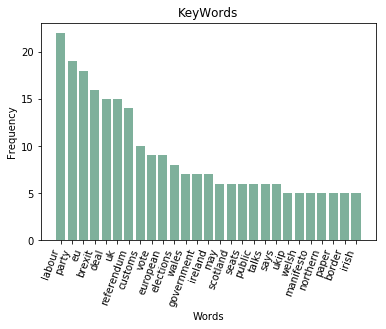

In [80]:
#畫關鍵字詞頻barplot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def barplot(x, y,x_label="", y_label="", title=""): 
    _, ax = plt.subplots()
    
    ax.bar(x,y, color="#7EB09B", align = 'center')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
    
wrd_cnt = {}
for alist in newset:
    for wrds in alist:
        if wrds not in wrd_cnt:
            wrd_cnt[wrds] = 1
        else:
            wrd_cnt[wrds] += 1
            
key_wrds = {}
for vocab in wrd_cnt.keys():
    if wrd_cnt[vocab] >= 5:
        #print(vocab, wrd_cnt[vocab])
        key_wrds[vocab] = wrd_cnt[vocab]

sort_key_wrds = dict(sorted(key_wrds.items(), key= lambda x:x[1], reverse = True))
#print(sort_key_wrds)

fig = plt.figure(figsize = (12, 6))
barplot(sort_key_wrds.keys(), sort_key_wrds.values(), x_label = 'Words', y_label = 'Frequency', title = 'KeyWords')

print(sort_key_wrds.keys())

In [84]:
#  Transform data
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(newset).transform(newset)
df2 = pd.DataFrame(te_ary, columns = te.columns_) 
#graph = df.T # transpose
#graph.columns = news_frame['title']
df2.rows = news_frame['title']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [85]:
df2.head()

,00,000,04,15,16,1993,2014,2018,2019,30,...,world,worst,worth,wouldn,write,year,yes,you,your,yvette
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [86]:
# 利用支持度篩選關鍵詞
minsup = 0.05
#apriori(graph, min_support = minsup, use_colnames = True) # itemset: 新聞
result = apriori(df2, min_support = minsup, use_colnames = True) # itemset: 單詞
result

,support,itemsets
0,0.0625,(border)
1,0.2000,(brexit)
2,0.0500,(conservatives)
3,0.1250,(customs)
4,0.1875,(deal)
5,0.0500,(election)
6,0.1000,(elections)
7,0.2250,(eu)
8,0.1125,(european)
9,0.0875,(government)


In [87]:
rules = association_rules(result, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(election),(deal),0.0500,0.1875,0.0500,1.000000,5.333333,0.040625,inf
1,(vote),(deal),0.1125,0.1875,0.0875,0.777778,4.148148,0.066406,3.65625
2,(election),(labour),0.0500,0.2750,0.0500,1.000000,3.636364,0.036250,inf
3,(election),(party),0.0500,0.2375,0.0500,1.000000,4.210526,0.038125,inf
4,(elections),(party),0.1000,0.2375,0.0750,0.750000,3.157895,0.051250,3.05000
5,(uk),(eu),0.1875,0.2250,0.1375,0.733333,3.259259,0.095313,2.90625
6,(ireland),(northern),0.0875,0.0625,0.0625,0.714286,11.428571,0.057031,3.28125
7,(northern),(ireland),0.0625,0.0875,0.0625,1.000000,11.428571,0.057031,inf
8,(manifesto),(labour),0.0625,0.2750,0.0500,0.800000,2.909091,0.032813,3.62500
9,(public),(labour),0.0750,0.2750,0.0625,0.833333,3.030303,0.041875,4.35000


由上表大概可看出Brexit新聞裡，給定某些單詞出現的情況下，特定單字出現的機率高，且有346組itemset（總樣本數：821)
超過給定Confidence threshold = 0.7

In [71]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(deal),(brexit),0.1875,0.2000,0.0500,0.266667,1.333333,0.012500,1.090909
1,(brexit),(deal),0.2000,0.1875,0.0500,0.250000,1.333333,0.012500,1.083333
2,(referendum),(brexit),0.1750,0.2000,0.0500,0.285714,1.428571,0.015000,1.120000
3,(brexit),(referendum),0.2000,0.1750,0.0500,0.250000,1.428571,0.015000,1.100000
4,(said),(brexit),0.3125,0.2000,0.0750,0.240000,1.200000,0.012500,1.052632
5,(we),(brexit),0.1625,0.2000,0.0500,0.307692,1.538462,0.017500,1.155556
6,(brexit),(we),0.2000,0.1625,0.0500,0.250000,1.538462,0.017500,1.116667
7,(deal),(customs),0.1875,0.1250,0.0625,0.333333,2.666667,0.039062,1.312500
8,(customs),(deal),0.1250,0.1875,0.0625,0.500000,2.666667,0.039062,1.625000
9,(eu),(customs),0.2250,0.1250,0.0500,0.222222,1.777778,0.021875,1.125000


特定單詞的關聯度(lift)高，如：customs & deal, election & deal, (public, referendum)&(labour, party, vote, deal)等
全部樣本皆超過門檻 lift threshold = 1.2，單詞出現的關聯程度高

In [72]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(deal),(brexit),0.1875,0.2000,0.050,0.266667,1.333333,0.0125,1.090909,1
1,(brexit),(deal),0.2000,0.1875,0.050,0.250000,1.333333,0.0125,1.083333,1
2,(referendum),(brexit),0.1750,0.2000,0.050,0.285714,1.428571,0.0150,1.120000,1
3,(brexit),(referendum),0.2000,0.1750,0.050,0.250000,1.428571,0.0150,1.100000,1
4,(said),(brexit),0.3125,0.2000,0.075,0.240000,1.200000,0.0125,1.052632,1


In [73]:
# 設定最終篩選條件
out = rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.8) &
       (rules['lift'] > 3) ]
out

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
141,"(election, labour)",(deal),0.0500,0.1875,0.0500,1.000000,5.333333,0.040625,inf,2
142,"(election, deal)",(labour),0.0500,0.2750,0.0500,1.000000,3.636364,0.036250,inf,2
147,"(election, deal)",(party),0.0500,0.2375,0.0500,1.000000,4.210526,0.038125,inf,2
148,"(election, party)",(deal),0.0500,0.1875,0.0500,1.000000,5.333333,0.040625,inf,2
155,"(deal, party)",(labour),0.0750,0.2750,0.0750,1.000000,3.636364,0.054375,inf,2
161,"(deal, public)",(labour),0.0500,0.2750,0.0500,1.000000,3.636364,0.036250,inf,2
167,"(deal, referendum)",(labour),0.0875,0.2750,0.0750,0.857143,3.116883,0.050937,5.0750,2
173,"(deal, said)",(labour),0.0500,0.2750,0.0500,1.000000,3.636364,0.036250,inf,2
179,"(deal, talks)",(labour),0.0500,0.2750,0.0500,1.000000,3.636364,0.036250,inf,2
183,"(labour, vote)",(deal),0.0875,0.1875,0.0750,0.857143,4.571429,0.058594,5.6875,2


Support Mean:         0.05604   Support Median:         0.05000
Confidence Mean:    0.64125   Confidence Median:    0.66667
Sample:  819


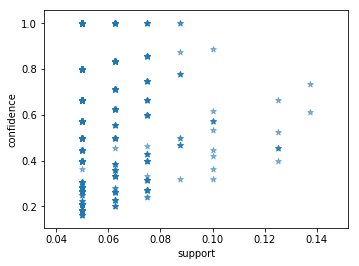

In [74]:

support = rules['support']
confidence = rules['confidence']

fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)

ax1.scatter(support, confidence, alpha=0.5, marker="*") #alpha : 設定透明度
ax1.set_xlabel('support')
ax1.set_ylabel('confidence') 

print("Support Mean: %15.5f" % support.mean(), "  Support Median: %15.5f" % support.median())
#print("Lift Mean: %21.5f" % lift.mean(), "  Lift Median: %22.5f" % lift.median())
print("Confidence Mean: %10.5f" % confidence.mean(), "  Confidence Median: %10.5f" % confidence.median())
print("Sample: ", np.shape(rules)[0])

接下來進一步視覺化不同新聞使用的單詞關聯性，欲藉正負面單詞的使用區分新聞的正負面程度

In [88]:
import networkx as nx
G = nx.DiGraph() #建立一個空graph，有方向性
for i in range(len(news_frame)):
    G.add_node(i) #80則新聞：80個nodes
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    #print(currentFrom[0], currentTo[0])
    G.add_edge(currentFrom[0], currentTo[0])
    '''for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0]) #currentTo是只含一個單詞的list
        #print(currentFrom[0], currentTo[0])'''

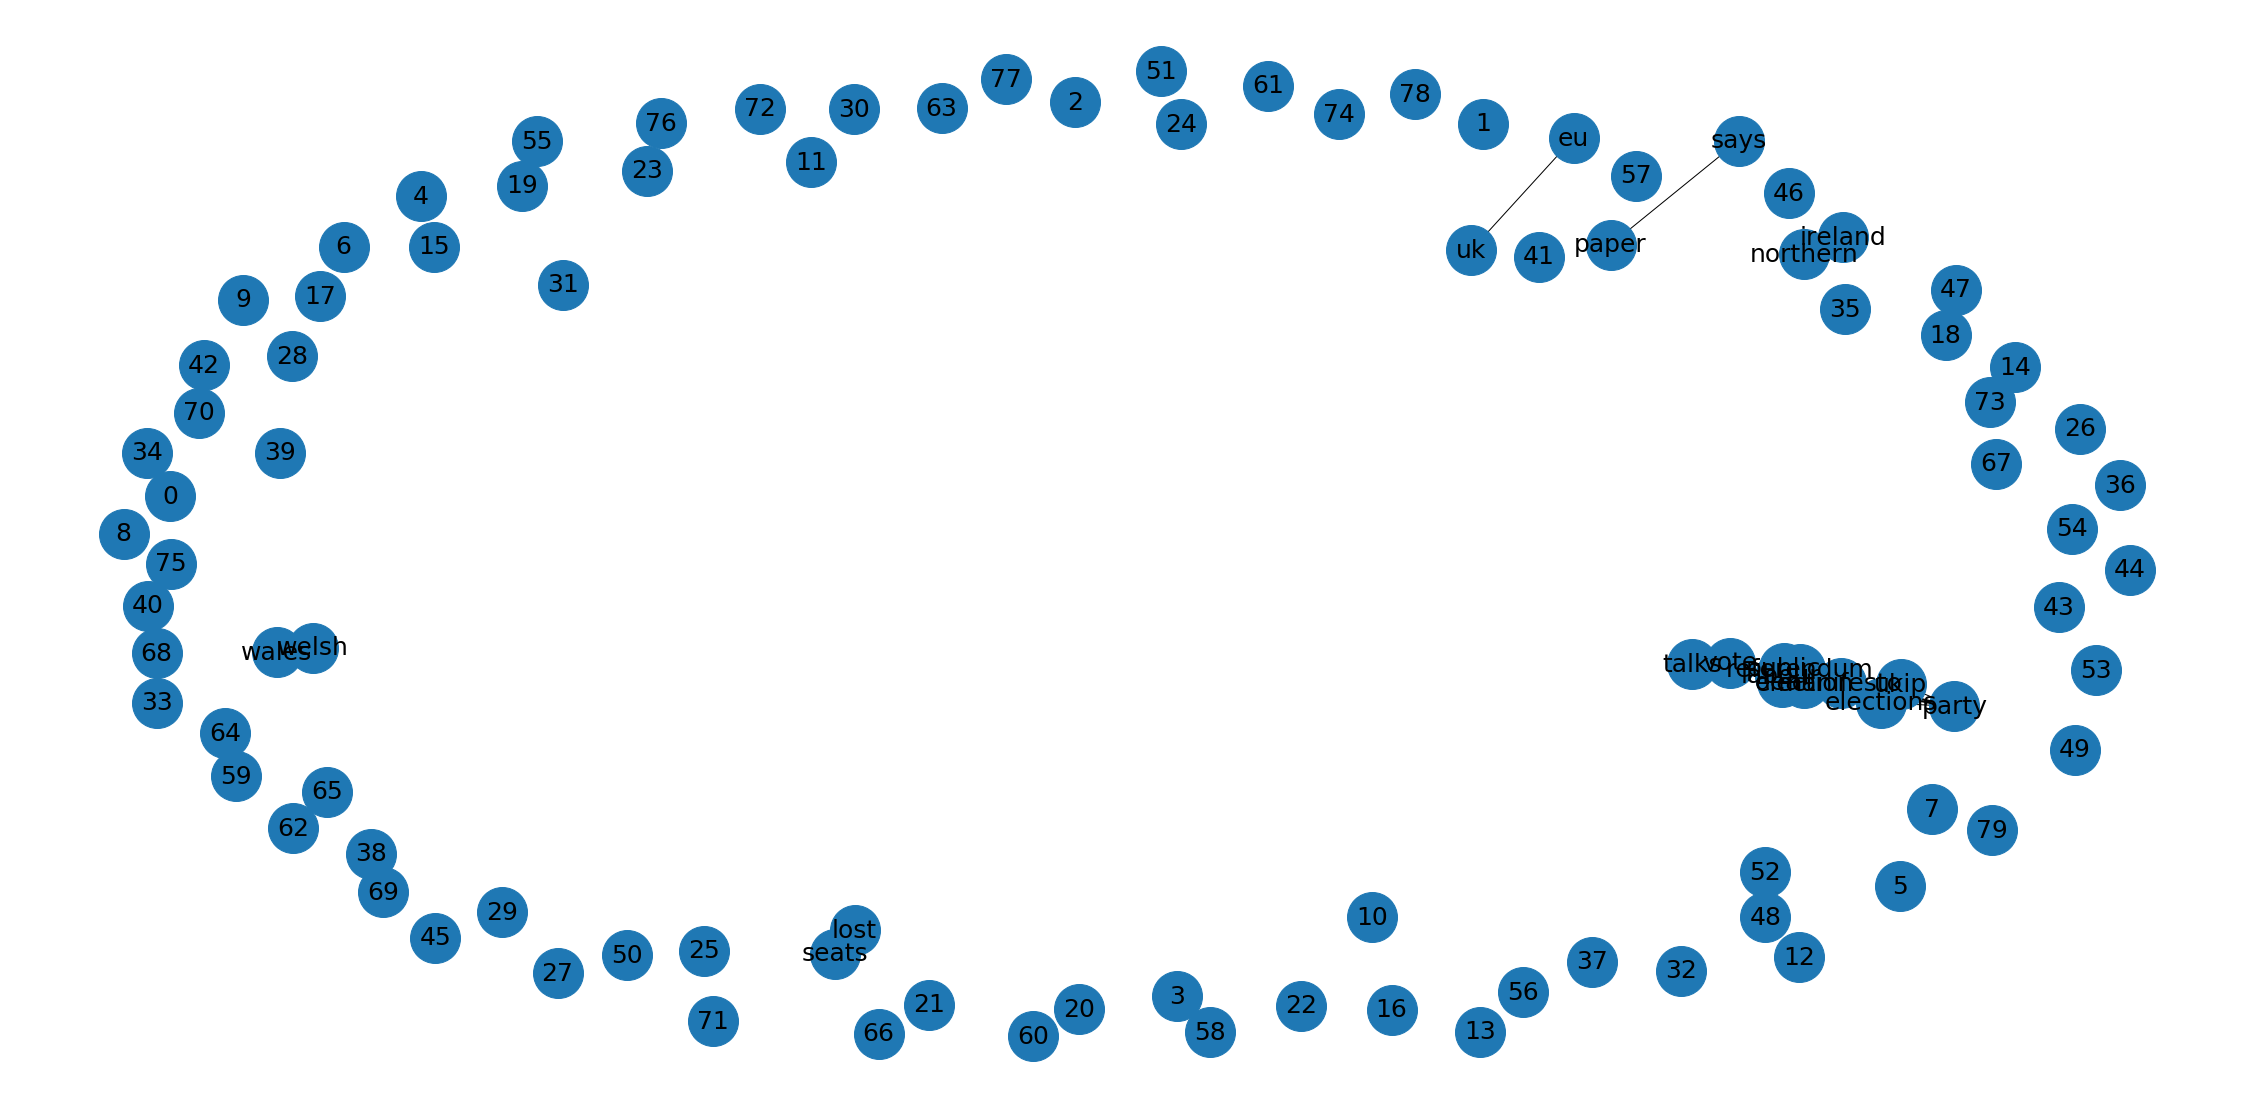

In [97]:
plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=2500)
nx.draw_networkx_edges(G, pos, width=1)

# labels
nx.draw_networkx_labels(G,pos,font_size=25,font_family='sans-serif')

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show()

結論：共現圖呈現關鍵詞群聚的現象，且無明顯正負面單詞群聚現象，頂多只能看出某些重點議題：北愛爾蘭邊界問題、國會席次、政黨(Labour Party, UKIP)等（見下方dominating_set）

＃可能無法單純判斷正負面單詞，但可以試著用特定議題的發生觀察對ETF價格及成交量的影響（例如北愛爾蘭議題新聞發生時價格及成交量的反應）

In [93]:
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('election', 'deal'),
 ('elections', 'party'),
 ('ireland', 'northern'),
 ('lost', 'seats'),
 ('manifesto', 'referendum'),
 ('paper', 'says'),
 ('uk', 'eu'),
 ('vote', 'labour'),
 ('wales', 'welsh')}